Importing Datasets from kaggle

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d chetankv/dogs-cats-images

 99% 431M/435M [00:04<00:00, 54.9MB/s]
100% 435M/435M [00:04<00:00, 96.6MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-cats-images.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D, Flatten, BatchNormalization, Dropout
import pickle
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
%matplotlib inline


Before any changes:

In [5]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    directory = "/content/dataset/training_set",
    labels = "inferred",
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    directory = "/content/dataset/test_set",
    labels = "inferred",
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 8000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [6]:
def Normalize_0_1(image,label):
    image = tf.cast(image/255.,tf.float32)
    return image,label

train_dataset = train_dataset.map(Normalize_0_1)
validation_dataset = validation_dataset.map(Normalize_0_1)

After some changes

In [25]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=lambda x: x / 255.0  # Normalization function
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/dataset/training_set',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    '/content/dataset/test_set',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
# train_subset = train_dataset.take(2400)
# val_subset = validation_dataset.take(600)

In [ ]:
# print(train_subset)
# print(val_subset)

first model

In [ ]:
model = Sequential([
    Conv2D(32,kernel_size = (3,3),padding = "valid",activation = "relu", input_shape =(256,256,3)),
    MaxPooling2D(pool_size = (2,2),strides = 2,padding = "valid"),

    Conv2D(64,kernel_size = (3,3),padding = "valid",activation = "relu"),
    MaxPooling2D(pool_size = (2,2),strides = 2,padding = "valid"),

    Conv2D(128,kernel_size = (3,3),padding = "valid",activation = "relu"),
    MaxPooling2D(pool_size = (2,2),strides = 2,padding = "valid"),
    Flatten(),

    Dense(128,activation = "relu"),
    Dense(64,activation = "relu"),
    Dense(1,activation = "sigmoid"),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer= "adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset,epochs=10,validation_data=validation_dataset)

Epoch 1/10
250/250 [==============================] - 1149s 5s/step - loss: 0.6891 - accuracy: 0.5406 - val_loss: 0.6256 - val_accuracy: 0.6400
Epoch 2/10
250/250 [==============================] - 1126s 5s/step - loss: 0.6241 - accuracy: 0.6525 - val_loss: 0.5929 - val_accuracy: 0.6770
Epoch 3/10
250/250 [==============================] - 1087s 4s/step - loss: 0.5799 - accuracy: 0.6914 - val_loss: 0.5750 - val_accuracy: 0.7070
Epoch 4/10
250/250 [==============================] - 1080s 4s/step - loss: 0.4916 - accuracy: 0.7550 - val_loss: 0.6282 - val_accuracy: 0.7190
Epoch 5/10
250/250 [==============================] - 1086s 4s/step - loss: 0.3974 - accuracy: 0.8117 - val_loss: 0.6195 - val_accuracy: 0.7405
Epoch 6/10
250/250 [==============================] - 1086s 4s/step - loss: 0.2631 - accuracy: 0.8879 - val_loss: 0.8491 - val_accuracy: 0.7365
Epoch 7/10
250/250 [==============================] - 1134s 5s/step - loss: 0.1557 - accuracy: 0.9379 - val_loss: 1.0320 - val_accuracy:

In [ ]:
filename = 'cats_vs_dogs_trained_model'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

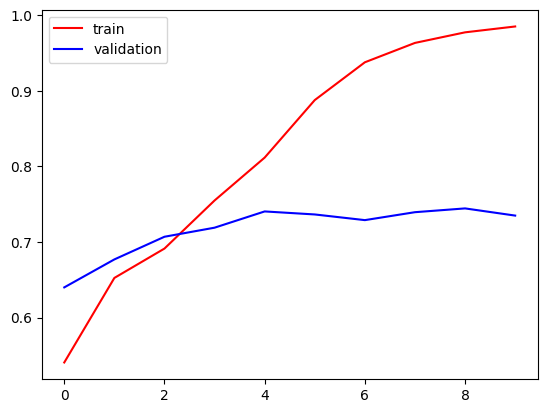

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color = 'blue',label='validation')
plt.legend()
plt.show()

Using Batch normalization and dropout

In [7]:
model1 = Sequential([
    Conv2D(32,kernel_size = (3,3),padding = "valid",activation = "relu", input_shape =(256,256,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2),strides = 2,padding = "valid"),

    Conv2D(64,kernel_size = (3,3),padding = "valid",activation = "relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2),strides = 2,padding = "valid"),

    Conv2D(128,kernel_size = (3,3),padding = "valid",activation = "relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2),strides = 2,padding = "valid"),
    Flatten(),

    Dense(128,activation = "relu"),
    Dropout(0.1),
    Dense(64,activation = "relu"),
    Dropout(0.1),
    Dense(1,activation = "sigmoid"),
])

In [ ]:
model1.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
history1 = model1.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10
250/250 [==============================] - 1518s 6s/step - loss: 2.1091 - accuracy: 0.5454 - val_loss: 1.4534 - val_accuracy: 0.4980
Epoch 2/10
250/250 [==============================] - 1455s 6s/step - loss: 0.7711 - accuracy: 0.5585 - val_loss: 1.0423 - val_accuracy: 0.5820
Epoch 3/10
250/250 [==============================] - 1417s 6s/step - loss: 0.6547 - accuracy: 0.6237 - val_loss: 0.6258 - val_accuracy: 0.6540
Epoch 4/10
250/250 [==============================] - 1462s 6s/step - loss: 0.6283 - accuracy: 0.6727 - val_loss: 0.6116 - val_accuracy: 0.6655
Epoch 5/10
250/250 [==============================] - 1459s 6s/step - loss: 0.5816 - accuracy: 0.7017 - val_loss: 0.6169 - val_accuracy: 0.6605
Epoch 6/10
250/250 [==============================] - 1455s 6s/step - loss: 0.5409 - accuracy: 0.7303 - val_loss: 0.6194 - val_accuracy: 0.6900
Epoch 7/10
250/250 [==============================] - 1452s 6s/step - loss: 0.4927 - accuracy: 0.7644 - val_loss: 0.5699 - val_accuracy:

In [ ]:
filename = 'cats_vs_dogs_improved_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model1, file)

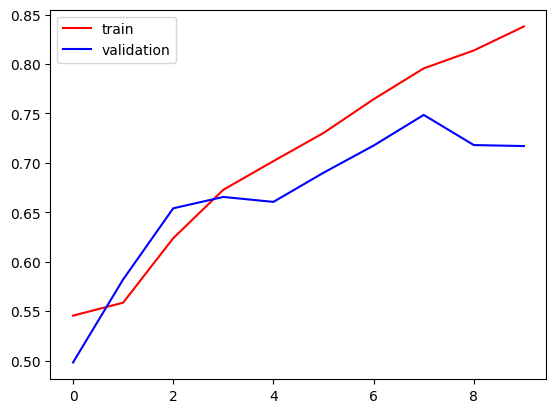

In [ ]:
plt.plot(history1.history['accuracy'],color='red',label='train')
plt.plot(history1.history['val_accuracy'],color = 'blue',label='validation')
plt.legend()
plt.show()

In [9]:
model1.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
history2 = model1.fit(train_dataset, epochs=20, validation_data=validation_dataset)

Epoch 1/20
250/250 [==============================] - 37s 112ms/step - loss: 2.0475 - accuracy: 0.5648 - val_loss: 0.9899 - val_accuracy: 0.5160
Epoch 2/20
250/250 [==============================] - 27s 105ms/step - loss: 0.6990 - accuracy: 0.6277 - val_loss: 0.6588 - val_accuracy: 0.6190
Epoch 3/20
250/250 [==============================] - 29s 113ms/step - loss: 0.5765 - accuracy: 0.6992 - val_loss: 0.5976 - val_accuracy: 0.6670
Epoch 4/20
250/250 [==============================] - 26s 105ms/step - loss: 0.5319 - accuracy: 0.7355 - val_loss: 0.5947 - val_accuracy: 0.6795
Epoch 5/20
250/250 [==============================] - 29s 116ms/step - loss: 0.4886 - accuracy: 0.7673 - val_loss: 0.6382 - val_accuracy: 0.7305
Epoch 6/20
250/250 [==============================] - 26s 104ms/step - loss: 0.4146 - accuracy: 0.8075 - val_loss: 0.6144 - val_accuracy: 0.7110
Epoch 7/20
250/250 [==============================] - 26s 104ms/step - loss: 0.3542 - accuracy: 0.8440 - val_loss: 0.5779 - val_ac

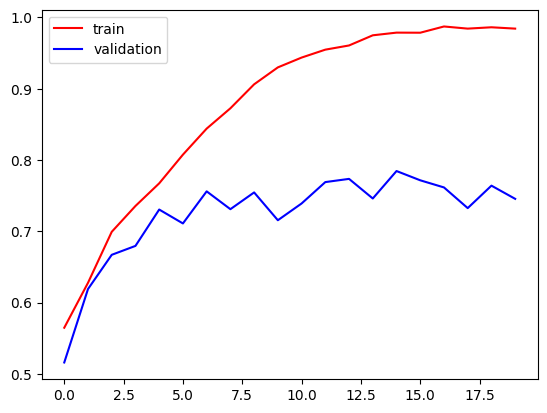

In [10]:
plt.plot(history2.history['accuracy'],color='red',label='train')
plt.plot(history2.history['val_accuracy'],color = 'blue',label='validation')
plt.legend()
plt.show()

In [28]:
model2 = Sequential([
    Conv2D(32,kernel_size = (3,3),padding = "valid",activation = "relu", input_shape =(256,256,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2),strides = 2,padding = "valid"),

    Conv2D(64,kernel_size = (3,3),padding = "valid",activation = "relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2),strides = 2,padding = "valid"),

    Conv2D(128,kernel_size = (3,3),padding = "valid",activation = "relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2),strides = 2,padding = "valid"),
    Flatten(),

    Dense(128,activation = "relu", kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(64,activation = "relu", kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1,activation = "sigmoid"),
])

In [29]:
model2.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
history3 = model2.fit(train_dataset, epochs=50, validation_data=validation_dataset)

Epoch 1/50
250/250 [==============================] - 35s 114ms/step - loss: 9.2444 - accuracy: 0.5270 - val_loss: 5.2033 - val_accuracy: 0.5185
Epoch 2/50
250/250 [==============================] - 27s 107ms/step - loss: 2.6749 - accuracy: 0.5216 - val_loss: 1.7984 - val_accuracy: 0.5205
Epoch 3/50
250/250 [==============================] - 27s 106ms/step - loss: 1.8895 - accuracy: 0.5351 - val_loss: 1.4774 - val_accuracy: 0.5585
Epoch 4/50
250/250 [==============================] - 29s 114ms/step - loss: 1.5008 - accuracy: 0.5353 - val_loss: 1.5056 - val_accuracy: 0.6310
Epoch 5/50
250/250 [==============================] - 27s 105ms/step - loss: 1.5719 - accuracy: 0.6004 - val_loss: 1.7614 - val_accuracy: 0.5600
Epoch 6/50
250/250 [==============================] - 28s 108ms/step - loss: 1.5335 - accuracy: 0.6118 - val_loss: 1.3340 - val_accuracy: 0.6385
Epoch 7/50
250/250 [==============================] - 29s 114ms/step - loss: 1.2296 - accuracy: 0.6733 - val_loss: 1.2117 - val_ac

In [30]:
filename = 'cats_vs_dogs_super_improved_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model2, file)

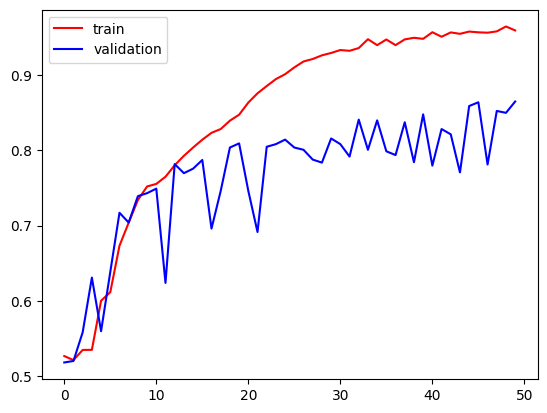

In [31]:
plt.plot(history3.history['accuracy'],color='red',label='train')
plt.plot(history3.history['val_accuracy'],color = 'blue',label='validation')
plt.legend()
plt.show()

In [27]:
model2.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
history4 = model2.fit(train_generator, epochs=50, validation_data=validation_generator)

Epoch 1/50
250/250 [==============================] - 143s 557ms/step - loss: 8.8628 - accuracy: 0.5397 - val_loss: 5.1992 - val_accuracy: 0.5030
Epoch 2/50
250/250 [==============================] - 139s 555ms/step - loss: 2.7264 - accuracy: 0.5239 - val_loss: 8.7542 - val_accuracy: 0.5220
Epoch 3/50
250/250 [==============================] - 138s 553ms/step - loss: 1.7491 - accuracy: 0.5330 - val_loss: 3.6237 - val_accuracy: 0.5430
Epoch 4/50
250/250 [==============================] - 138s 551ms/step - loss: 1.1857 - accuracy: 0.5529 - val_loss: 1.1348 - val_accuracy: 0.5005
Epoch 5/50
250/250 [==============================] - 137s 548ms/step - loss: 1.0640 - accuracy: 0.5780 - val_loss: 7.8863 - val_accuracy: 0.5660
Epoch 6/50
250/250 [==============================] - 138s 552ms/step - loss: 0.9533 - accuracy: 0.5763 - val_loss: 5.3129 - val_accuracy: 0.5315
Epoch 7/50
250/250 [==============================] - 139s 556ms/step - loss: 0.9214 - accuracy: 0.5936 - val_loss: 50.2336 

KeyboardInterrupt: 